In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
path = "/content/drive/MyDrive/Colab Notebooks/datakelulusanmahasiswa.xlsx - Sheet1.csv"
df = pd.read_csv(path)

data = df.copy()

In [37]:
# 2.1 Bersihkan spasi nama kolom
data.columns = data.columns.str.strip()

# 2.2 Pisahkan numerik & kategorikal
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# 2.3 Imputasi nilai hilang numerik → median
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# 2.4 Imputasi nilai hilang kategorikal → mode
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# 2.5 Encode kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 2.6 Encode kolom target
label_encoder_target = LabelEncoder()
data["STATUS KELULUSAN"] = label_encoder_target.fit_transform(data["STATUS KELULUSAN"])

# 2.7 Tentukan fitur & label
X = data.drop(columns=["NAMA", "STATUS KELULUSAN"], errors="ignore")
y = data["STATUS KELULUSAN"]

# 2.8 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("NaN setelah preprocessing:", np.isnan(X_scaled).sum())

NaN setelah preprocessing: 0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", 0.1, 1]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("\nBest Model :", best_model)
print("Best Params :", grid.best_params_)


Best Model : SVC(C=10)
Best Params : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



AKURASI TEST : 0.9210526315789473

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        33

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



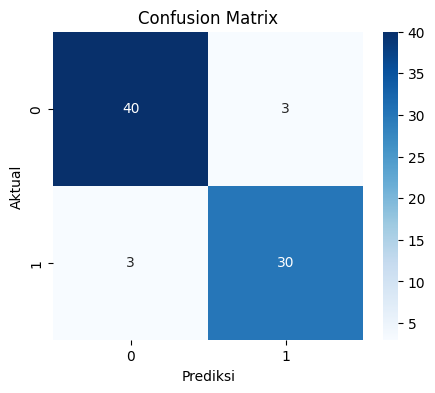

In [51]:
y_pred = best_model.predict(X_test)

print("\nAKURASI TEST :", accuracy_score(y_test, y_pred))
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

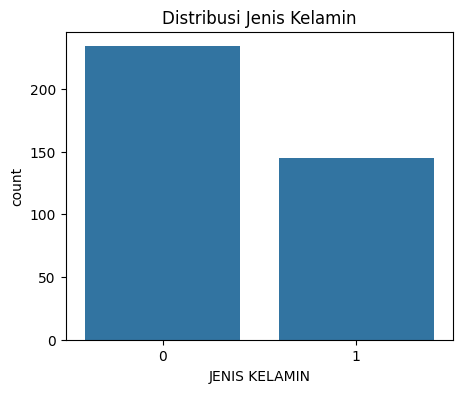

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x=data["JENIS KELAMIN"])
plt.title("Distribusi Jenis Kelamin")
plt.show()


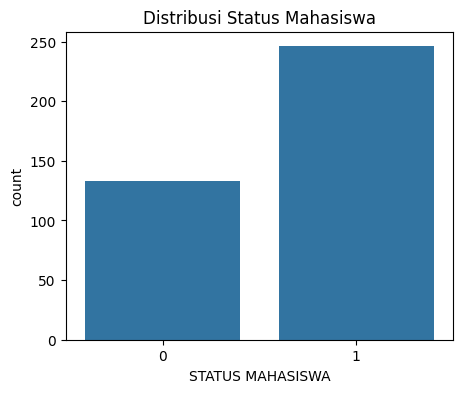

In [59]:
plt.figure(figsize=(5,4))
sns.countplot(x=data["STATUS MAHASISWA"])
plt.title("Distribusi Status Mahasiswa")
plt.show()

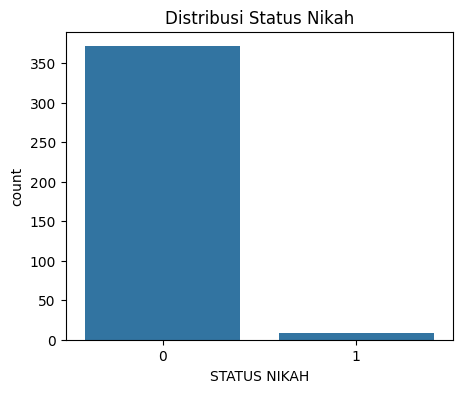

In [60]:
plt.figure(figsize=(5,4))
sns.countplot(x=data["STATUS NIKAH"])
plt.title("Distribusi Status Nikah")
plt.show()

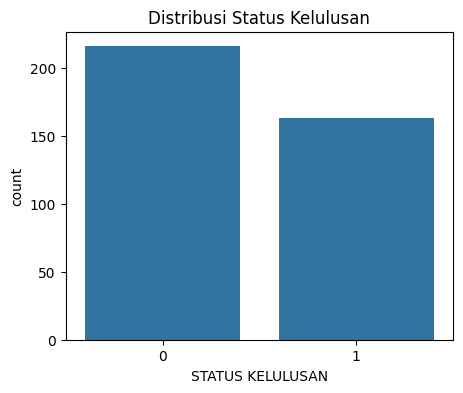

In [61]:
plt.figure(figsize=(5,4))
sns.countplot(x=data["STATUS KELULUSAN"])
plt.title("Distribusi Status Kelulusan")
plt.show()

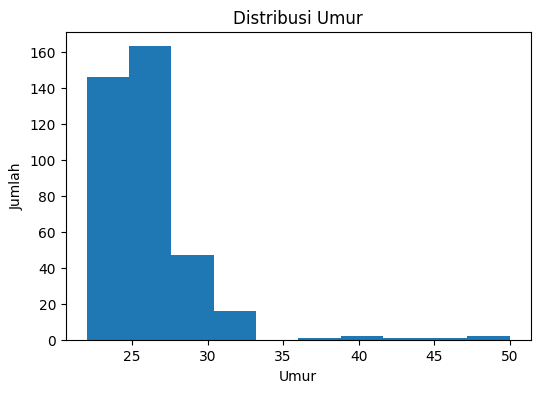

In [62]:
plt.figure(figsize=(6,4))
plt.hist(data["UMUR"], bins=10)
plt.title("Distribusi Umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()


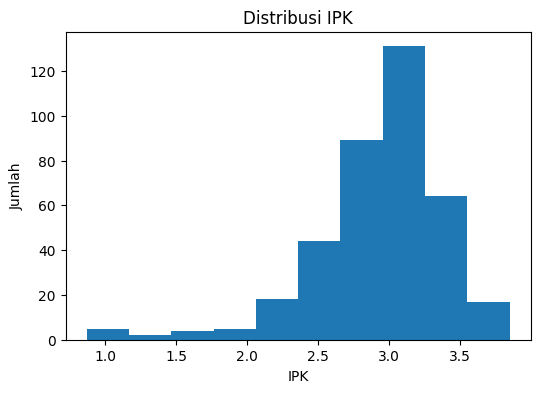

In [63]:
plt.figure(figsize=(6,4))
plt.hist(data["IPK"], bins=10)
plt.title("Distribusi IPK")
plt.xlabel("IPK")
plt.ylabel("Jumlah")
plt.show()

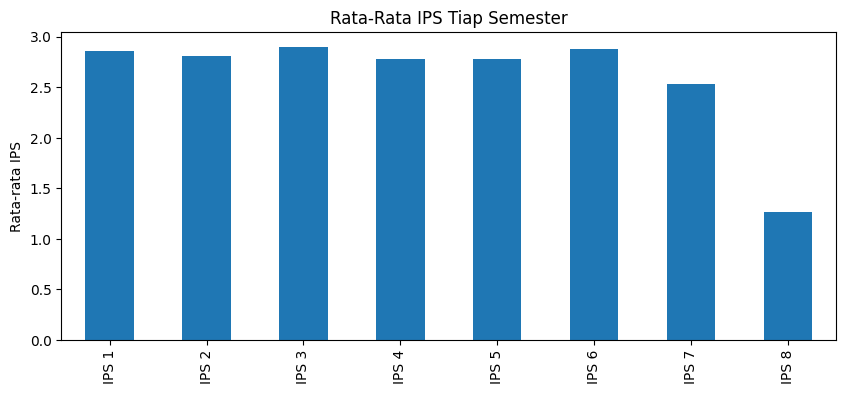

In [64]:
ips_cols = ['IPS 1','IPS 2','IPS 3','IPS 4','IPS 5','IPS 6','IPS 7','IPS 8']

plt.figure(figsize=(10,4))
data[ips_cols].mean().plot(kind='bar')
plt.title("Rata-Rata IPS Tiap Semester")
plt.ylabel("Rata-rata IPS")
plt.show()

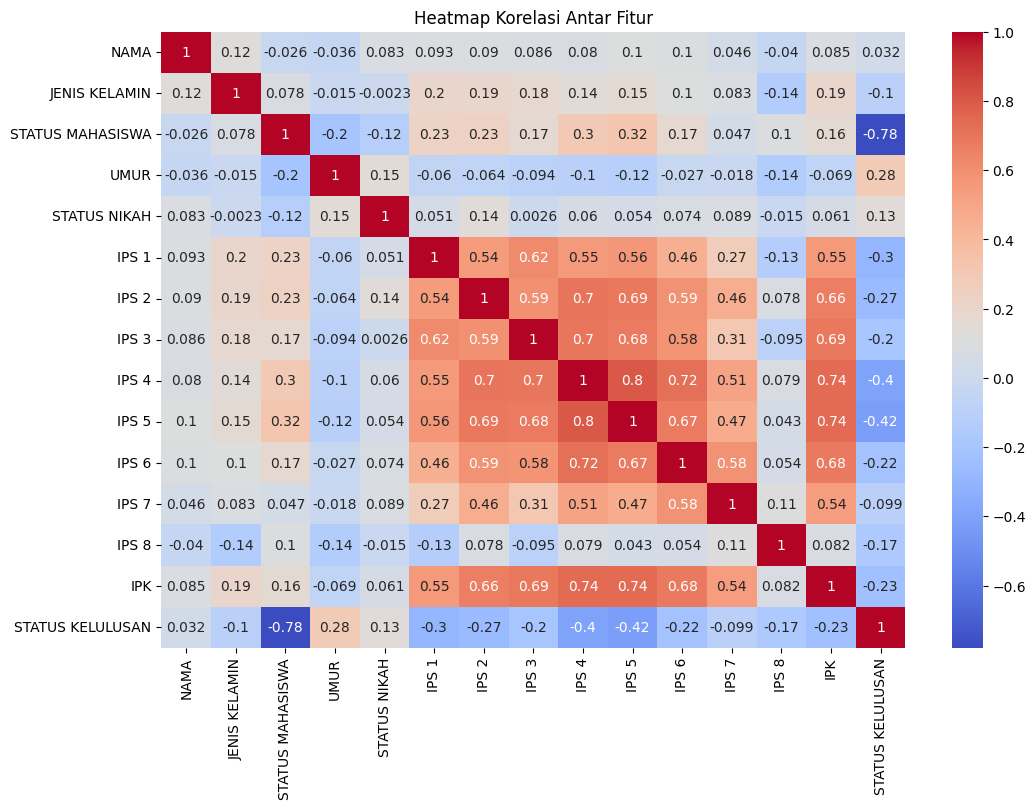

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

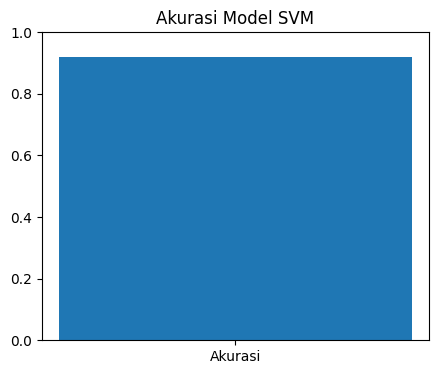

In [66]:
plt.figure(figsize=(5,4))
plt.bar(["Akurasi"], [accuracy_score(y_test, y_pred)])
plt.ylim(0,1)
plt.title("Akurasi Model SVM")
plt.show()

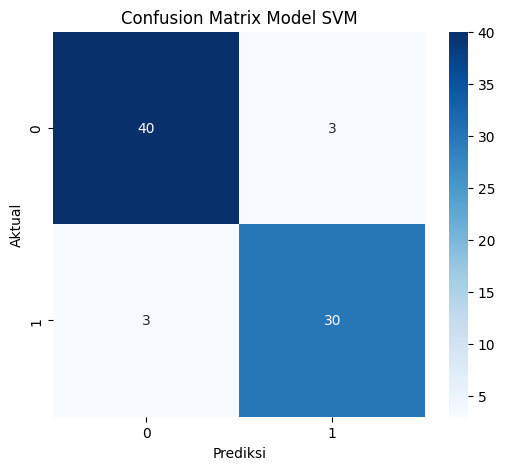

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Model SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [41]:
def prediksi_kelulusan(input_data):
    """
    input_data harus berupa DICT dengan semua kolom fitur lengkap
    Contoh format ada di bawah
    """

    df_new = pd.DataFrame([input_data])

    # Pastikan urutan kolom sama dengan X
    df_new = df_new[X.columns]

    # Encode kategorikal
    for col in df_new.columns:
        if col in label_encoders:
            df_new[col] = label_encoders[col].transform(df_new[col])

    # Scaling
    df_scaled = scaler.transform(df_new)

    # Prediksi
    pred = best_model.predict(df_scaled)[0]

    return label_encoder_target.inverse_transform([pred])[0]